In [1]:
from datasets import load_dataset
import matplotlib.pyplot as plt
from transformers import AutoModelForSequenceClassification, TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import expit
from scipy.special import softmax
from transformers import pipeline
from sentence_transformers import CrossEncoder
import torch
from transformers import BartForSequenceClassification, BartTokenizer

In [2]:
# pip install nlp

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Multi_nli dataset

In [14]:
dataset = load_dataset('multi_nli')

Using custom data configuration default


Generating train split:   0%|          | 0/392702 [00:00<?, ? examples/s]

Generating validation_matched split:   0%|          | 0/9815 [00:00<?, ? examples/s]

Generating validation_mismatched split:   0%|          | 0/9832 [00:00<?, ? examples/s]

Dataset multi_nli downloaded and prepared to C:/Users/researcher/.cache/huggingface/datasets/multi_nli/default/0.0.0/591f72eb6263d1ab527561777936b199b714cda156d35716881158a2bd144f39. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [15]:
dataset

DatasetDict({
    train: Dataset({
        features: ['promptID', 'pairID', 'premise', 'premise_binary_parse', 'premise_parse', 'hypothesis', 'hypothesis_binary_parse', 'hypothesis_parse', 'genre', 'label'],
        num_rows: 392702
    })
    validation_matched: Dataset({
        features: ['promptID', 'pairID', 'premise', 'premise_binary_parse', 'premise_parse', 'hypothesis', 'hypothesis_binary_parse', 'hypothesis_parse', 'genre', 'label'],
        num_rows: 9815
    })
    validation_mismatched: Dataset({
        features: ['promptID', 'pairID', 'premise', 'premise_binary_parse', 'premise_parse', 'hypothesis', 'hypothesis_binary_parse', 'hypothesis_parse', 'genre', 'label'],
        num_rows: 9832
    })
})

In [16]:
dataset['train'].features

{'promptID': Value(dtype='int32', id=None),
 'pairID': Value(dtype='string', id=None),
 'premise': Value(dtype='string', id=None),
 'premise_binary_parse': Value(dtype='string', id=None),
 'premise_parse': Value(dtype='string', id=None),
 'hypothesis': Value(dtype='string', id=None),
 'hypothesis_binary_parse': Value(dtype='string', id=None),
 'hypothesis_parse': Value(dtype='string', id=None),
 'genre': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=3, names=['entailment', 'neutral', 'contradiction'], id=None)}

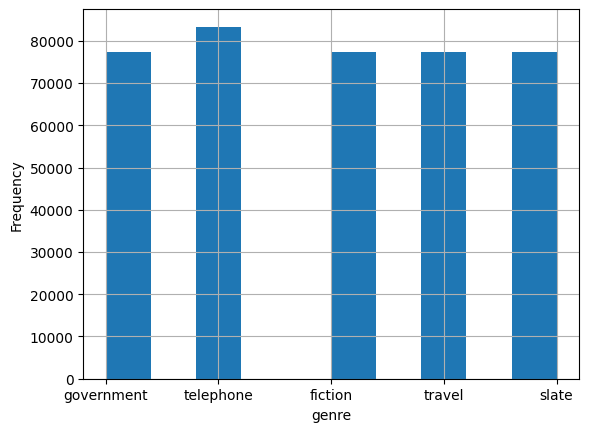

In [17]:
df=dataset['train']
plt.hist(df["genre"])
plt.xlabel('genre')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Text classification

## AutoModelForSequenceClassification

### tweet-topic-21-multi

In [18]:
MODEL = f"cardiffnlp/tweet-topic-21-single"
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
class_mapping = model.config.id2label

text = "music is not bad, it corresponds to the lonely atmosphere but nothing outstanding if u ask."
tokens = tokenizer(text, return_tensors='pt')
output = model(**tokens)

scores = output[0][0].detach().numpy()
scores = expit(scores)
predictions = (scores >= 0.5) * 1


# TF
#tf_model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
#class_mapping = model.config.id2label
#text = "It is great to see athletes promoting awareness for climate change."
#tokens = tokenizer(text, return_tensors='tf')
#output = tf_model(**tokens)
#scores = output[0][0]
#scores = expit(scores)
#predictions = (scores >= 0.5) * 1

# Map to classes
for i in range(len(predictions)):
    if predictions[i]:
        print(class_mapping[i])

Downloading:   0%|          | 0.00/1.30k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.16k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

pop_culture


### cardiffnlp/tweet-topic-21-single

In [19]:
MODEL = f"cardiffnlp/tweet-topic-21-single"
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
class_mapping = model.config.id2label

text = "music is not bad, it corresponds to the lonely atmosphere but nothing outstanding if u ask."
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)

scores = output[0][0].detach().numpy()
scores = softmax(scores)

# TF
#model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
#class_mapping = model.config.id2label
#text = "Tesla stock is on the rise!"
#encoded_input = tokenizer(text, return_tensors='tf')
#output = model(**encoded_input)
#scores = output[0][0]
#scores = softmax(scores)


ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = class_mapping[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

1) pop_culture 0.9834
2) daily_life 0.0055
3) arts_&_culture 0.0036
4) sports_&_gaming 0.0033
5) science_&_technology 0.0023
6) business_&_entrepreneurs 0.002


### typeform/distilbert-base-uncased-mnli

In [20]:
tokenizer = AutoTokenizer.from_pretrained("typeform/distilbert-base-uncased-mnli")
model = AutoModelForSequenceClassification.from_pretrained("typeform/distilbert-base-uncased-mnli")
classifier = pipeline('zero-shot-classification', model=model, tokenizer=tokenizer)
labels =['Computer configuration', 'Input devices',  'In-game setting', 'Game running', 'Optimise', 'Bugs and Crashes', 'Save progress', 'Trading mechanics', 'Exploration mechanics', 'Combat mechanics', 'Survival mechanics', 'Multiplayer version','Single player version', 'Missions', 'Base building', 'Customise', 'Gameplay length','Inventory management' , 'Cargo trade goods', 'Graphics' , 'Environment', 'Music', 'Camera angle','Story', 'UI', 'Guide', 'Avatar agent', 'Game Knowledge', 'Skill', 'Difficulty','Frustration', 'Speed', 'Discovery', 'Completion', 'Structuring', 'Conscious Awareness', 'Absorption', 'Realism','Dexterity', 'Socio-Cultural Proximity', 'Encouragement', 'Curiosity', 'Self-improvement', 'Homogeneity', 'Reaction','Sensory Appeal', 'Interaction with NPC', 'Interaction with players', 'Pre-ordered', 'Non-pre-ordered', 'Returned player','Playing hours', 'Patches' , 'New Content' , 'Mod', 'Promotion', 'Advertising', 'Launch', 'Streaming YouTuber','Recommendation', 'Target player', 'Comparison', 'Developer Publisher', 'Game', 'Review', 'Reviewers Other players','Devs/game types: AAA/indie', 'Early access', 'Worth issues', 'Economy (sell price)', 'Refund']
text=['multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!']

result1 = classifier(text, labels, multi_label=True)
print (result1)

Downloading:   0%|          | 0.00/258 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/776 [00:00<?, ?B/s]

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

[{'sequence': 'multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!', 'labels': ['Game', 'Multiplayer version', 'Interaction with players', 'Comparison', 'Optimise', 'Save progress', 'Structuring', 'Dexterity', 'New Content', 'Interaction with NPC', 'Encouragement', 'Recommendation', 'Refund', 'Self-improvement', 'Skill', 'Promotion', 'Socio-Cultural Proximity', 'Reviewers Other players', 'Realism', 'Input devices', 'Graphics', 'Sensory Appeal', 'Absorption', 'Speed', 'Review', 'Story', 'Customise', 'Worth issues', 'Guide', 'Conscious Awareness', 'Curiosity', 'Base building', 'In-game setting', 'Early access', 'Game Knowledge', 'Computer configuration', 'Completion', 'Cargo trade goods', 'Exploration mechanics', 'Environment', 'Survival mechanics', 'Devs/game types: AAA/indie', 'Missions', 'Pre-ordered', 'Combat mechanics', 'Camera angle', 'Non-pre-ordered', 'Developer Publisher', 'Target player', 'Mod', 'Streaming You

### Narsil/deberta-large-mnli-zero-cls

In [21]:
tokenizer = AutoTokenizer.from_pretrained("Narsil/deberta-large-mnli-zero-cls")
model = AutoModelForSequenceClassification.from_pretrained("Narsil/deberta-large-mnli-zero-cls")
classifier = pipeline('zero-shot-classification', model=model, tokenizer=tokenizer)
labels =['Computer configuration', 'Input devices',  'In-game setting', 'Game running', 'Optimise', 'Bugs and Crashes', 'Save progress', 'Trading mechanics', 'Exploration mechanics', 'Combat mechanics', 'Survival mechanics', 'Multiplayer version','Single player version', 'Missions', 'Base building', 'Customise', 'Gameplay length','Inventory management' , 'Cargo trade goods', 'Graphics' , 'Environment', 'Music', 'Camera angle','Story', 'UI', 'Guide', 'Avatar agent', 'Game Knowledge', 'Skill', 'Difficulty','Frustration', 'Speed', 'Discovery', 'Completion', 'Structuring', 'Conscious Awareness', 'Absorption', 'Realism','Dexterity', 'Socio-Cultural Proximity', 'Encouragement', 'Curiosity', 'Self-improvement', 'Homogeneity', 'Reaction','Sensory Appeal', 'Interaction with NPC', 'Interaction with players', 'Pre-ordered', 'Non-pre-ordered', 'Returned player','Playing hours', 'Patches' , 'New Content' , 'Mod', 'Promotion', 'Advertising', 'Launch', 'Streaming YouTuber','Recommendation', 'Target player', 'Comparison', 'Developer Publisher', 'Game', 'Review', 'Reviewers Other players','Devs/game types: AAA/indie', 'Early access', 'Worth issues', 'Economy (sell price)', 'Refund']
text=['multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!']

result1 = classifier(text, labels, multi_label=True)
print (result1)

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/729 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.62G [00:00<?, ?B/s]

Some weights of the model checkpoint at Narsil/deberta-large-mnli-zero-cls were not used when initializing DebertaForSequenceClassification: ['config']
- This IS expected if you are initializing DebertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[{'sequence': 'multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!', 'labels': ['Interaction with players', 'Encouragement', 'Multiplayer version', 'New Content', 'Recommendation', 'Comparison', 'Cargo trade goods', 'Optimise', 'Game Knowledge', 'Interaction with NPC', 'In-game setting', 'Review', 'Promotion', 'Reviewers Other players', 'Game', 'Gameplay length', 'Guide', 'Worth issues', 'Camera angle', 'Pre-ordered', 'Launch', 'Reaction', 'Exploration mechanics', 'Skill', 'Dexterity', 'Game running', 'Base building', 'Avatar agent', 'Trading mechanics', 'Curiosity', 'Sensory Appeal', 'Save progress', 'Completion', 'Structuring', 'Devs/game types: AAA/indie', 'UI', 'Missions', 'Non-pre-ordered', 'Graphics', 'Combat mechanics', 'Target player', 'Difficulty', 'Playing hours', 'Discovery', 'Mod', 'Realism', 'Returned player', 'Developer Publisher', 'Absorption', 'Patches', 'Story', 'Advertising', 'Environment', 'Input de

### DeBERTa-v3-xsmall-mnli-fever-anli-ling-binary

In [23]:
# device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device=torch.device('cpu')

model_name = "MoritzLaurer/DeBERTa-v3-xsmall-mnli-fever-anli-ling-binary"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

premise = "multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!"
hypothesis = "The game is attractive because of the multiplayer pattern."

input = tokenizer(premise, hypothesis, truncation=True, return_tensors="pt")
output = model(input["input_ids"].to(device))  # device = "cuda:0" or "cpu"
prediction = torch.softmax(output["logits"][0], -1).tolist()
label_names = ["entailment", "not_entailment"]
prediction = {name: round(float(pred) * 100, 1) for pred, name in zip(prediction, label_names)}
print(prediction)

{'entailment': 61.5, 'not_entailment': 38.5}


### NDugar/ZSD-microsoft-v2xxlmnli

In [24]:
tokenizer = AutoTokenizer.from_pretrained("NDugar/ZSD-microsoft-v2xxlmnli")
model = AutoModelForSequenceClassification.from_pretrained("NDugar/ZSD-microsoft-v2xxlmnli")
classifier = pipeline('zero-shot-classification', model=model, tokenizer=tokenizer)
labels =['Computer configuration', 'Input devices',  'In-game setting', 'Game running', 'Optimise', 'Bugs and Crashes', 'Save progress', 'Trading mechanics', 'Exploration mechanics', 'Combat mechanics', 'Survival mechanics', 'Multiplayer version','Single player version', 'Missions', 'Base building', 'Customise', 'Gameplay length','Inventory management' , 'Cargo trade goods', 'Graphics' , 'Environment', 'Music', 'Camera angle','Story', 'UI', 'Guide', 'Avatar agent', 'Game Knowledge', 'Skill', 'Difficulty','Frustration', 'Speed', 'Discovery', 'Completion', 'Structuring', 'Conscious Awareness', 'Absorption', 'Realism','Dexterity', 'Socio-Cultural Proximity', 'Encouragement', 'Curiosity', 'Self-improvement', 'Homogeneity', 'Reaction','Sensory Appeal', 'Interaction with NPC', 'Interaction with players', 'Pre-ordered', 'Non-pre-ordered', 'Returned player','Playing hours', 'Patches' , 'New Content' , 'Mod', 'Promotion', 'Advertising', 'Launch', 'Streaming YouTuber','Recommendation', 'Target player', 'Comparison', 'Developer Publisher', 'Game', 'Review', 'Reviewers Other players','Devs/game types: AAA/indie', 'Early access', 'Worth issues', 'Economy (sell price)', 'Refund']
text=['multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!']

result1 = classifier(text, labels, multi_label=True)
print (result1)

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/952 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.45M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Downloading:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[{'sequence': 'multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!', 'labels': ['Interaction with players', 'Comparison', 'Multiplayer version', 'Self-improvement', 'Encouragement', 'New Content', 'Promotion', 'In-game setting', 'Skill', 'Optimise', 'Game Knowledge', 'Recommendation', 'Game', 'Mod', 'Reviewers Other players', 'Realism', 'Sensory Appeal', 'Game running', 'Completion', 'Returned player', 'Gameplay length', 'Save progress', 'Review', 'Conscious Awareness', 'Guide', 'Dexterity', 'Difficulty', 'Patches', 'Reaction', 'Worth issues', 'Story', 'Avatar agent', 'Non-pre-ordered', 'Curiosity', 'Launch', 'Customise', 'Discovery', 'Missions', 'Homogeneity', 'Target player', 'Developer Publisher', 'Interaction with NPC', 'Speed', 'Socio-Cultural Proximity', 'Absorption', 'Environment', 'Structuring', 'Trading mechanics', 'Devs/game types: AAA/indie', 'Advertising', 'Early access', 'Playing hours', 'Combat mechanics

In [25]:
tokenizer = AutoTokenizer.from_pretrained("NDugar/debertav3-mnli-snli-anli")
model = AutoModelForSequenceClassification.from_pretrained("NDugar/debertav3-mnli-snli-anli")
classifier = pipeline('zero-shot-classification', model=model, tokenizer=tokenizer)
labels =['Computer configuration', 'Input devices',  'In-game setting', 'Game running', 'Optimise', 'Bugs and Crashes', 'Save progress', 'Trading mechanics', 'Exploration mechanics', 'Combat mechanics', 'Survival mechanics', 'Multiplayer version','Single player version', 'Missions', 'Base building', 'Customise', 'Gameplay length','Inventory management' , 'Cargo trade goods', 'Graphics' , 'Environment', 'Music', 'Camera angle','Story', 'UI', 'Guide', 'Avatar agent', 'Game Knowledge', 'Skill', 'Difficulty','Frustration', 'Speed', 'Discovery', 'Completion', 'Structuring', 'Conscious Awareness', 'Absorption', 'Realism','Dexterity', 'Socio-Cultural Proximity', 'Encouragement', 'Curiosity', 'Self-improvement', 'Homogeneity', 'Reaction','Sensory Appeal', 'Interaction with NPC', 'Interaction with players', 'Pre-ordered', 'Non-pre-ordered', 'Returned player','Playing hours', 'Patches' , 'New Content' , 'Mod', 'Promotion', 'Advertising', 'Launch', 'Streaming YouTuber','Recommendation', 'Target player', 'Comparison', 'Developer Publisher', 'Game', 'Review', 'Reviewers Other players','Devs/game types: AAA/indie', 'Early access', 'Worth issues', 'Economy (sell price)', 'Refund']
text=['multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!']

result1 = classifier(text, labels, multi_label=True)
print (result1)

Downloading:   0%|          | 0.00/418 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/18.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/156 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

[{'sequence': 'multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!', 'labels': ['Interaction with players', 'Multiplayer version', 'Comparison', 'Review', 'New Content', 'Game', 'Recommendation', 'Computer configuration', 'Non-pre-ordered', 'Input devices', 'Early access', 'Patches', 'Mod', 'Launch', 'Reviewers Other players', 'Guide', 'Gameplay length', 'Optimise', 'Base building', 'Discovery', 'Interaction with NPC', 'Developer Publisher', 'Save progress', 'Worth issues', 'Avatar agent', 'Customise', 'Returned player', 'Pre-ordered', 'Target player', 'Combat mechanics', 'Curiosity', 'In-game setting', 'Missions', 'Game Knowledge', 'Speed', 'Devs/game types: AAA/indie', 'Reaction', 'Streaming YouTuber', 'Music', 'Bugs and Crashes', 'Survival mechanics', 'Exploration mechanics', 'Socio-Cultural Proximity', 'Self-improvement', 'Promotion', 'Encouragement', 'Game running', 'Completion', 'Playing hours', 'Skill', 'Dexter

## Cross-Encoder for Natural Language Inference

In [26]:
# pip install sentence-transformers

In [27]:
classifier = pipeline("zero-shot-classification", model='cross-encoder/nli-distilroberta-base')

sent = "multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!"
candidate_labels = labels
res = classifier(sent, candidate_labels)
print(res)

Downloading:   0%|          | 0.00/701 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/329M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

{'sequence': 'multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!', 'labels': ['Multiplayer version', 'Encouragement', 'Game', 'Interaction with players', 'Non-pre-ordered', 'Comparison', 'New Content', 'Gameplay length', 'Save progress', 'Returned player', 'Single player version', 'Game running', 'Worth issues', 'Self-improvement', 'Skill', 'Interaction with NPC', 'Completion', 'Environment', 'Pre-ordered', 'Guide', 'In-game setting', 'Game Knowledge', 'Reaction', 'Review', 'Homogeneity', 'Difficulty', 'UI', 'Recommendation', 'Promotion', 'Patches', 'Missions', 'Dexterity', 'Reviewers Other players', 'Optimise', 'Discovery', 'Mod', 'Early access', 'Customise', 'Combat mechanics', 'Advertising', 'Camera angle', 'Computer configuration', 'Structuring', 'Devs/game types: AAA/indie', 'Exploration mechanics', 'Graphics', 'Story', 'Trading mechanics', 'Speed', 'Input devices', 'Survival mechanics', 'Realism', 'Music', 'Soc

In [28]:
classifier = pipeline("zero-shot-classification", model='cross-encoder/nli-deberta-v3-base')

sent = "multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!"
candidate_labels = labels
res = classifier(sent, candidate_labels)
print(res)

Downloading:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/738M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/417 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/18.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/156 [00:00<?, ?B/s]

{'sequence': 'multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!', 'labels': ['Interaction with players', 'Socio-Cultural Proximity', 'Multiplayer version', 'New Content', 'In-game setting', 'Non-pre-ordered', 'Interaction with NPC', 'Camera angle', 'Game', 'Comparison', 'Recommendation', 'Sensory Appeal', 'Homogeneity', 'Guide', 'Skill', 'Self-improvement', 'Game running', 'Survival mechanics', 'Streaming YouTuber', 'Gameplay length', 'Realism', 'Combat mechanics', 'Devs/game types: AAA/indie', 'Mod', 'Optimise', 'Reviewers Other players', 'Promotion', 'Target player', 'Difficulty', 'Returned player', 'Developer Publisher', 'Computer configuration', 'Review', 'Customise', 'Save progress', 'Worth issues', 'Launch', 'Conscious Awareness', 'Early access', 'Single player version', 'Game Knowledge', 'Completion', 'Trading mechanics', 'Environment', 'Exploration mechanics', 'UI', 'Encouragement', 'Reaction', 'Graphics', '

In [29]:
classifier = pipeline("zero-shot-classification", model='cross-encoder/nli-roberta-base')

sent = "multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!"
candidate_labels = labels
res = classifier(sent, candidate_labels)
print(res)

Downloading:   0%|          | 0.00/702 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

{'sequence': 'multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!', 'labels': ['Multiplayer version', 'Game', 'Interaction with players', 'Gameplay length', 'New Content', 'Non-pre-ordered', 'Mod', 'Comparison', 'Single player version', 'In-game setting', 'Encouragement', 'Game running', 'UI', 'Returned player', 'Recommendation', 'Camera angle', 'Reaction', 'Playing hours', 'Advertising', 'Customise', 'Save progress', 'Graphics', 'Input devices', 'Early access', 'Pre-ordered', 'Environment', 'Promotion', 'Self-improvement', 'Skill', 'Review', 'Computer configuration', 'Missions', 'Reviewers Other players', 'Realism', 'Story', 'Completion', 'Guide', 'Launch', 'Trading mechanics', 'Difficulty', 'Game Knowledge', 'Optimise', 'Structuring', 'Dexterity', 'Interaction with NPC', 'Speed', 'Worth issues', 'Music', 'Exploration mechanics', 'Devs/game types: AAA/indie', 'Absorption', 'Combat mechanics', 'Developer Publisher', '

In [30]:
classifier = pipeline("zero-shot-classification", model='cross-encoder/nli-deberta-v3-xsmall')

sent = "multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!"
candidate_labels = labels
res = classifier(sent, candidate_labels)
print(res)

Downloading:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/283M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/419 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/18.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/156 [00:00<?, ?B/s]

{'sequence': 'multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!', 'labels': ['Interaction with players', 'New Content', 'Game running', 'Multiplayer version', 'In-game setting', 'Homogeneity', 'Game', 'Recommendation', 'Reviewers Other players', 'Interaction with NPC', 'Worth issues', 'Game Knowledge', 'Self-improvement', 'Curiosity', 'Pre-ordered', 'Save progress', 'Sensory Appeal', 'Non-pre-ordered', 'Single player version', 'Combat mechanics', 'Optimise', 'Returned player', 'Computer configuration', 'Streaming YouTuber', 'Completion', 'Speed', 'Socio-Cultural Proximity', 'Target player', 'Playing hours', 'Devs/game types: AAA/indie', 'Customise', 'Guide', 'Gameplay length', 'Difficulty', 'Encouragement', 'Missions', 'Input devices', 'Comparison', 'Environment', 'Early access', 'Exploration mechanics', 'Launch', 'Camera angle', 'Mod', 'Developer Publisher', 'Survival mechanics', 'Promotion', 'Trading mechanics', '

In [31]:
classifier = pipeline("zero-shot-classification", model='cross-encoder/nli-MiniLM2-L6-H768')

sent = "multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!"
candidate_labels = labels
res = classifier(sent, candidate_labels)
print(res)

Downloading:   0%|          | 0.00/875 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/329M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/330 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

{'sequence': 'multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!', 'labels': ['Multiplayer version', 'Interaction with players', 'New Content', 'Encouragement', 'Gameplay length', 'Non-pre-ordered', 'In-game setting', 'Save progress', 'Input devices', 'Customise', 'Recommendation', 'Game', 'Comparison', 'Reviewers Other players', 'Early access', 'Skill', 'Returned player', 'Optimise', 'Game Knowledge', 'Game running', 'Devs/game types: AAA/indie', 'Mod', 'Single player version', 'Worth issues', 'Interaction with NPC', 'Structuring', 'UI', 'Self-improvement', 'Survival mechanics', 'Promotion', 'Pre-ordered', 'Completion', 'Realism', 'Graphics', 'Dexterity', 'Conscious Awareness', 'Camera angle', 'Guide', 'Review', 'Absorption', 'Combat mechanics', 'Trading mechanics', 'Reaction', 'Story', 'Playing hours', 'Launch', 'Speed', 'Missions', 'Computer configuration', 'Exploration mechanics', 'Sensory Appeal', 'Difficulty', 

## DeBERTa-v3-large-mnli-fever-anli-ling-wanli

In [32]:
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/DeBERTa-v3-large-mnli-fever-anli-ling-wanli")
sequence_to_classify = "multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!"
candidate_labels = labels
output = classifier(sequence_to_classify, candidate_labels, multi_label=False)
print(output)

Downloading:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/870M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/395 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.65M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/18.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/156 [00:00<?, ?B/s]

{'sequence': 'multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!', 'labels': ['Interaction with players', 'Multiplayer version', 'Recommendation', 'New Content', 'Self-improvement', 'Difficulty', 'In-game setting', 'Encouragement', 'Reviewers Other players', 'Game', 'Computer configuration', 'Advertising', 'Game running', 'Non-pre-ordered', 'Comparison', 'Worth issues', 'Completion', 'Review', 'Promotion', 'Input devices', 'Gameplay length', 'Combat mechanics', 'UI', 'Frustration', 'Missions', 'Realism', 'Cargo trade goods', 'Playing hours', 'Environment', 'Base building', 'Returned player', 'Save progress', 'Curiosity', 'Launch', 'Target player', 'Guide', 'Pre-ordered', 'Dexterity', 'Skill', 'Developer Publisher', 'Patches', 'Economy (sell price)', 'Avatar agent', 'Trading mechanics', 'Interaction with NPC', 'Devs/game types: AAA/indie', 'Single player version', 'Exploration mechanics', 'Camera angle', 'Discovery', 

## BartForSequenceClassification

### joeddav/bart-lage-mnli-yahoo-answers

In [33]:
nlp = pipeline("zero-shot-classification", model="joeddav/bart-large-mnli-yahoo-answers")

sequence_to_classify = "multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!"
candidate_labels = labels
hypothesis_template = "This text is about {}."
nlp(sequence_to_classify, candidate_labels, multi_class=True, hypothesis_template=hypothesis_template)

Downloading:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


{'sequence': 'multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!',
 'labels': ['Multiplayer version',
  'In-game setting',
  'Game',
  'Game running',
  'Mod',
  'Devs/game types: AAA/indie',
  'Game Knowledge',
  'Interaction with players',
  'Developer Publisher',
  'Computer configuration',
  'New Content',
  'Graphics',
  'Skill',
  'Interaction with NPC',
  'Completion',
  'Difficulty',
  'Gameplay length',
  'UI',
  'Combat mechanics',
  'Input devices',
  'Patches',
  'Single player version',
  'Exploration mechanics',
  'Launch',
  'Missions',
  'Streaming YouTuber',
  'Customise',
  'Trading mechanics',
  'Survival mechanics',
  'Reviewers Other players',
  'Structuring',
  'Optimise',
  'Save progress',
  'Comparison',
  'Early access',
  'Playing hours',
  'Environment',
  'Discovery',
  'Returned player',
  'Story',
  'Bugs and Crashes',
  'Speed',
  'Review',
  'Base building',
  'Non-pre-ordered',
  'Gu

In [34]:
# pose sequence as a NLI premise and label as a hypothesis
nli_model = BartForSequenceClassification.from_pretrained('joeddav/bart-large-mnli-yahoo-answers')
tokenizer = BartTokenizer.from_pretrained('joeddav/bart-large-mnli-yahoo-answers')

sequence="multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!"
label=labels
premise = sequence
hypothesis = f'This text is about {label}.'

# run through model pre-trained on MNLI
x = tokenizer.encode(premise, hypothesis, return_tensors='pt',
                        max_length=tokenizer.model_max_length,
                        truncation_strategy='only_first')

logits = nli_model(x.to())[0]

# we throw away "neutral" (dim 1) and take the probability of
# "entailment" (2) as the probability of the label being true 
entail_contradiction_logits = logits[:,[0,2]]
probs = entail_contradiction_logits.softmax(dim=1)
prob_label_is_true = probs[:,1]
prob_label_is_true

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


tensor([0.7284], grad_fn=<SelectBackward0>)

### navteca/bart-large-mnli

In [35]:
bart_model = AutoModelForSequenceClassification.from_pretrained('navteca/bart-large-mnli')
bart_tokenizer = AutoTokenizer.from_pretrained('navteca/bart-large-mnli')

# Get predictions
nlp = pipeline('zero-shot-classification', model=bart_model, tokenizer=bart_tokenizer)

sequence = 'multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!'
candidate_labels = labels

result = nlp(sequence, candidate_labels, multi_label=True)

print(result)

Downloading:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/32.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!', 'labels': ['Multiplayer version', 'Interaction with players', 'Save progress', 'Game', 'Launch', 'Mod', 'New Content', 'Encouragement', 'Curiosity', 'Reviewers Other players', 'Optimise', 'Customise', 'Returned player', 'Difficulty', 'Skill', 'Worth issues', 'Patches', 'Target player', 'Environment', 'Reaction', 'Discovery', 'Gameplay length', 'Speed', 'Completion', 'Guide', 'Comparison', 'Review', 'Sensory Appeal', 'Pre-ordered', 'Recommendation', 'Dexterity', 'Developer Publisher', 'Game Knowledge', 'Game running', 'Promotion', 'Interaction with NPC', 'Refund', 'Avatar agent', 'Input devices', 'Playing hours', 'Non-pre-ordered', 'Absorption', 'Exploration mechanics', 'Trading mechanics', 'Graphics', 'Missions', 'Conscious Awareness', 'Story', 'Early access', 'Streaming YouTuber', 'Structuring', 'Socio-Cultural Proximity', 'Camera angle', 'Computer c

In [36]:
model = CrossEncoder('cross-encoder/nli-deberta-v3-large')
scores = model.predict([('multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!', 'The game is attractive because of the multiplayer pattern')])

#Convert scores to labels
label_mapping = labels
labelss = [label_mapping[score_max] for score_max in scores.argmax(axis=1)]
labelss

Downloading:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/418 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/18.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/156 [00:00<?, ?B/s]

['In-game setting']

## BERT

### digitalepidemiologylab/covid-twitter-bert-v2-mnli

In [37]:
classifier = pipeline("zero-shot-classification", model="digitalepidemiologylab/covid-twitter-bert-v2-mnli")

sequence_to_classify = 'multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!'
candidate_labels = labels
hypothesis_template = 'This example is {}.'
classifier(sequence_to_classify, candidate_labels, hypothesis_template=hypothesis_template, multi_class=True)

Downloading:   0%|          | 0.00/833 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/364 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'sequence': 'multiplayer before being something that could happen if you were lucky, is now a easy, more engaging and fun experience!',
 'labels': ['Interaction with players',
  'Multiplayer version',
  'Save progress',
  'Game',
  'Recommendation',
  'Worth issues',
  'Sensory Appeal',
  'Game Knowledge',
  'Skill',
  'Reviewers Other players',
  'Promotion',
  'Story',
  'Guide',
  'Gameplay length',
  'Encouragement',
  'Playing hours',
  'Self-improvement',
  'Socio-Cultural Proximity',
  'Advertising',
  'Game running',
  'Conscious Awareness',
  'Comparison',
  'Interaction with NPC',
  'New Content',
  'Trading mechanics',
  'Pre-ordered',
  'Target player',
  'Review',
  'Avatar agent',
  'Exploration mechanics',
  'Customise',
  'Optimise',
  'Developer Publisher',
  'Returned player',
  'Missions',
  'Bugs and Crashes',
  'Devs/game types: AAA/indie',
  'Camera angle',
  'Graphics',
  'Curiosity',
  'Survival mechanics',
  'Mod',
  'Early access',
  'Non-pre-ordered',
  'Str